# Custom Regression Models: Implementation and Validation

## Imports

In [16]:
from linear_regression import *
import logistic_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Linear Regression: Implementation Check & Evaluation

In [91]:
## Create Data
X, y = make_regression(n_samples=1000, n_features=5, noise=2, random_state=42)
print(X[:5])
print(y[:5])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])


[[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
 [-0.79919201 -0.64596418 -0.18289644 -0.48274352  1.37487642]
 [ 1.07600714 -0.79602586 -0.75196933  0.02131165 -0.31905394]
 [-0.10325476 -0.82849702  1.48986344 -1.64318881 -1.60090398]
 [-2.06340315  0.50325206 -0.64557207 -0.31735049 -1.66108342]]
[ 74.11216179 -43.56007598 -26.64280606 -86.41138633 -85.59969529]
[[ 2.13685019  0.59941972  0.48200818 -1.17746225  0.42508706]
 [-0.83985275 -0.64738798 -0.18442975 -0.52167138  1.35320121]
 [ 1.11477879 -0.79673013 -0.75423247 -0.01167004 -0.2934164 ]
 [-0.11443599 -0.8290456   1.49047543 -1.69580607 -1.5394634 ]
 [-2.15761518  0.49631793 -0.64769876 -0.35432727 -1.59796198]]


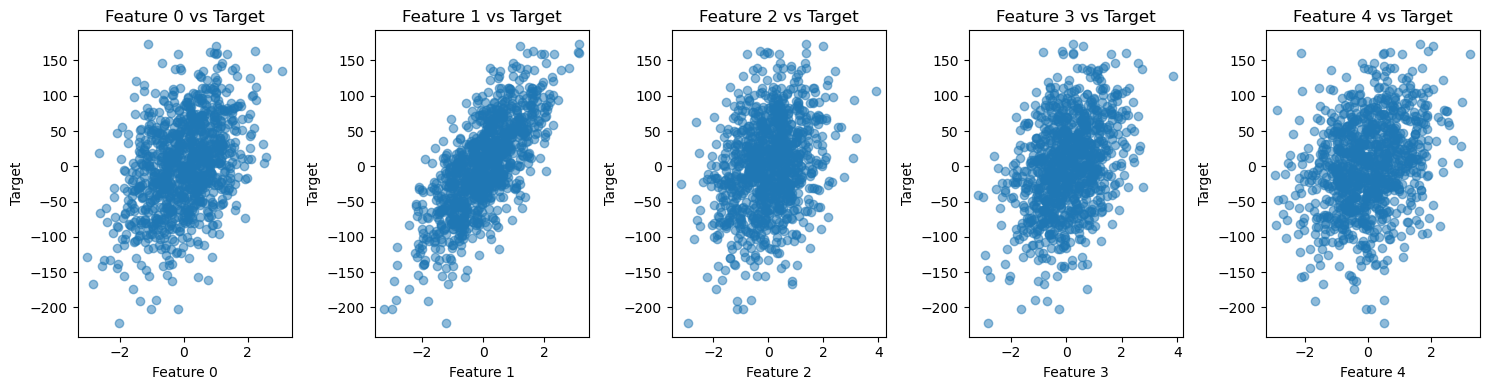

In [92]:
## Features vd Target

n_features = X.shape[1]

plt.figure(figsize=(15, 4))  # wide figure to fit multiple plots
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

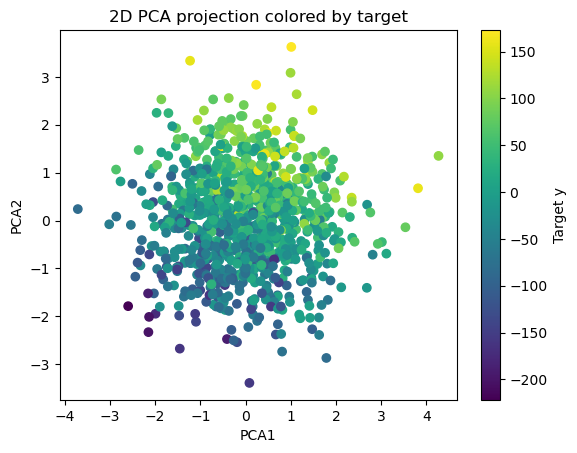

In [93]:
## Data Visulazation
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target y')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D PCA projection colored by target")
plt.show()

In [94]:
## Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [95]:
model = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

print(model.weights)
print(model.bias)


[-54.75007949 -64.45766686  52.49887077 -16.4748496   62.49556163]
[-53.70327501 -63.18377087  51.78395773 -13.79919263  61.56188227]
[27.31103759 46.24224695 16.77498354 24.41039954 19.56147216]
0.7684459338022198


In [96]:
rsme = model.evaluate(X_test, y_test)

print(rsme)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(np.mean((y_test - baseline_pred) ** 2))
print(baseline_rmse)
print(y_test.min(), y_test.max())


2.224002133184673
60.86071537105989
-141.6810809727213 158.94921743547778


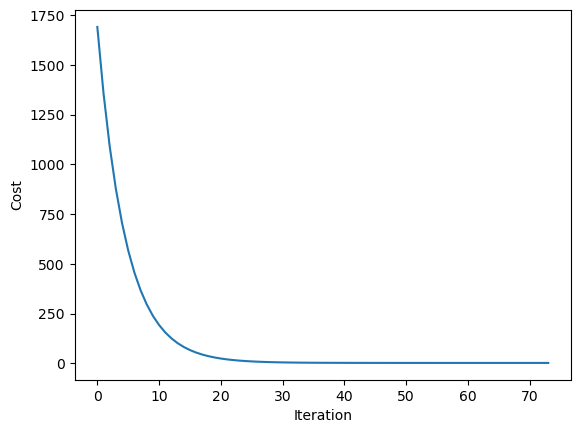

In [97]:
plt.plot(model.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

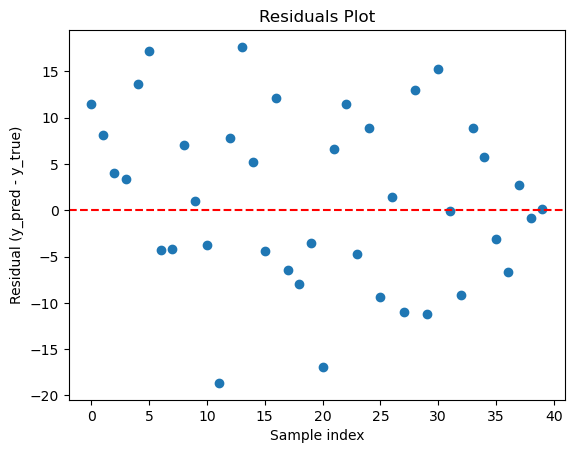

In [84]:
plt.scatter(range(len(y_test)), y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Sample index")
plt.ylabel("Residual (y_pred - y_true)")
plt.title("Residuals Plot")
plt.show()

## Custom Linear Regression vs Scikit-Learn